# Objective

The Objective of this project is analyze the buy new cars based on there features using webscraping,Exploratory Data Analysis(EDA) and data visualization to gain insights into car brands,prices,models and more.It would help the customer make an informed decision about buying a new car.

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from bs4 import BeautifulSoup
import requests

In [2]:
Brand= []
Price = []
Model = []
Version = []
Seater = []
Transmission=[]
Fuel_Type=[]
Vehicle_Type=[]

for i in range(1,20):
    start = time.time()
    URL='https://ackodrive.com/cars/page/{}'.format(i)
    page=requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

#Model
    for x in soup.find_all('span',attrs={'class':"styles__ModelName-sc-a6403e05-6 hGuUnc"}):
        model=(x.text)
        if model is None:
            Model.append(np.NaN)
        else:
            Model.append(model)
#Brand
    for x in soup.find_all('span',attrs={'class':"styles__Make-sc-a6403e05-5 etWSJY"}):
        brand=x.text 
        if brand is None:
            Brand.append(np.NaN)
        else:
            Brand.append(brand)
#Price            
    for x in soup.find_all('div',attrs={"class":"styles__Price-sc-a6403e05-18 bsWAfs"}):
        price = x.text
        if price is None:
            Price.append(np.NaN)
        else:
            Price.append(price)
#Version
    
    for x in soup.find_all('h3',attrs={"class":"styles__VariantTitle-sc-a6403e05-10 fXmXH"}):
        version=(x.text)
        if version is None:
            Version.append(np.NaN)
        else:
            Version.append(version)


#Fuel_type
    for x in soup.find_all('p',{'data-testid':"car_variant_fuel_type"}):
        fuel_type=(x.text)
        if fuel_type is None:
            Fuel_Type.append(np.NaN)
        else:
            Fuel_Type.append(fuel_type)
#Transmission
    for x in soup.find_all('p',{'data-testid':"car_variant_transmission"}):
        transmission=x.text
        if transmission is None:
            Transmission.append(np.NaN)
        else:
            Transmission.append(transmission)
            
#Seater            
    for x in soup.find_all('p',{'data-testid':"car_model_seat"}):
        seater=(x.text)
        if seater is None:
            Seater.append(np.NaN)
        else:
            Seater.append(seater)
#Vehicle_type
    for x in soup.find_all('p',{'data-testid':"car_model_body_type"}):
        type_veh=(x.text)
        if type_veh is None:
            Vehicle_Type.append(np.NaN)
        else:
            Vehicle_Type.append(type_veh)
            
    end=time.time()
    print('Page {} completed in {} seconds'.format(i,end-start))

Page 1 completed in 2.9711382389068604 seconds
Page 2 completed in 2.1894986629486084 seconds
Page 3 completed in 2.4921813011169434 seconds
Page 4 completed in 3.963526725769043 seconds
Page 5 completed in 2.5740723609924316 seconds
Page 6 completed in 4.7165021896362305 seconds
Page 7 completed in 3.8501033782958984 seconds
Page 8 completed in 2.66817045211792 seconds
Page 9 completed in 2.46989369392395 seconds
Page 10 completed in 3.471369504928589 seconds
Page 11 completed in 4.300625801086426 seconds
Page 12 completed in 3.2944819927215576 seconds
Page 13 completed in 3.286909580230713 seconds
Page 14 completed in 2.2187771797180176 seconds
Page 15 completed in 2.27679443359375 seconds
Page 16 completed in 4.017951488494873 seconds
Page 17 completed in 2.6181325912475586 seconds
Page 18 completed in 4.001713991165161 seconds
Page 19 completed in 3.475325584411621 seconds


In [3]:
print(len(Brand))
print(len(Model))
print(len(Price))
print(len(Transmission))
print(len(Version))
print(len(Seater))
print(len(Fuel_Type))
print(len(Vehicle_Type))

296
296
296
296
296
296
296
296


In [4]:
data={'Brand':Brand,
'Price':Price,
'Model':Model,
'Version':Version,
'Seater':Seater,
'Transmission':Transmission,
'Fuel_Type':Fuel_Type,
'Vehicle_Type':Vehicle_Type
}

df=pd.DataFrame(data)
df

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,₹68.05 L,EV6 (2022-2025),GT Line AWD,5 Seater,Automatic,Electric,SUV
292,BYD,₹30.31 L,e6 (2022-2024),GL,5 Seater,Automatic,Electric,SUV
293,MINI,₹54.73 L,Countryman,Cooper S JCW Inspired,5 Seater,Automatic,Petrol,SUV
294,Audi,₹2.51 Cr,RS Q8 (2020-2025),4.0L TFSI,5 Seater,Automatic,Petrol,SUV


In [5]:
#save the Dataframe
df.to_csv('Acko_drive_cars_data.csv')

In [6]:
#import the dataframe
df=pd.read_csv('Acko_drive_cars_data.csv')

In [7]:
df

,Unnamed: 0,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
291,291,Kia,₹68.05 L,EV6 (2022-2025),GT Line AWD,5 Seater,Automatic,Electric,SUV
292,292,BYD,₹30.31 L,e6 (2022-2024),GL,5 Seater,Automatic,Electric,SUV
293,293,MINI,₹54.73 L,Countryman,Cooper S JCW Inspired,5 Seater,Automatic,Petrol,SUV
294,294,Audi,₹2.51 Cr,RS Q8 (2020-2025),4.0L TFSI,5 Seater,Automatic,Petrol,SUV


In [8]:
#import the second dataframe
df1=pd.read_csv('Acko_drive_cars_data.csv')

In [9]:
df1

,Unnamed: 0,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
291,291,Kia,₹68.05 L,EV6 (2022-2025),GT Line AWD,5 Seater,Automatic,Electric,SUV
292,292,BYD,₹30.31 L,e6 (2022-2024),GL,5 Seater,Automatic,Electric,SUV
293,293,MINI,₹54.73 L,Countryman,Cooper S JCW Inspired,5 Seater,Automatic,Petrol,SUV
294,294,Audi,₹2.51 Cr,RS Q8 (2020-2025),4.0L TFSI,5 Seater,Automatic,Petrol,SUV


In [10]:
# Merging on common columns
df2=pd.concat([df,df1],axis=0)
df2


,Unnamed: 0,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
291,291,Kia,₹68.05 L,EV6 (2022-2025),GT Line AWD,5 Seater,Automatic,Electric,SUV
292,292,BYD,₹30.31 L,e6 (2022-2024),GL,5 Seater,Automatic,Electric,SUV
293,293,MINI,₹54.73 L,Countryman,Cooper S JCW Inspired,5 Seater,Automatic,Petrol,SUV
294,294,Audi,₹2.51 Cr,RS Q8 (2020-2025),4.0L TFSI,5 Seater,Automatic,Petrol,SUV


In [11]:
df2.to_csv("New_Cars_data.csv")

In [12]:
df2

,Unnamed: 0,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
291,291,Kia,₹68.05 L,EV6 (2022-2025),GT Line AWD,5 Seater,Automatic,Electric,SUV
292,292,BYD,₹30.31 L,e6 (2022-2024),GL,5 Seater,Automatic,Electric,SUV
293,293,MINI,₹54.73 L,Countryman,Cooper S JCW Inspired,5 Seater,Automatic,Petrol,SUV
294,294,Audi,₹2.51 Cr,RS Q8 (2020-2025),4.0L TFSI,5 Seater,Automatic,Petrol,SUV


In [13]:
#merge = pd.merge(df, df1, on='Brand', how='inner')
#merge

# Data Cleaning

In [14]:
#Removing the unnamed column
df2.drop('Unnamed: 0',axis=1,inplace=True)
#df2.drop('Unnamed: 0.1',axis=1,inplace=True)
df2.head()

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,₹13.01 L,Creta,1.5 E,5 Seater,Manual,Petrol,SUV
1,Hyundai,₹9.06 L,Venue,1.2 E,5 Seater,Manual,Petrol,SUV
2,Kia,₹9.50 L,Sonet,1.2 HTE(O),5 Seater,Manual,Petrol,SUV
3,Kia,₹10.60 L,Syros,1.0 HTK Turbo,5 Seater,Manual,Petrol,SUV
4,Maruti Suzuki,₹7.58 L,Baleno (2022-2025),1.2 Sigma,5 Seater,Manual,Petrol,Hatchback


In [15]:
#Removing special characters using regex
df2['Price']=df['Price'].replace('[^0-9]',"",regex=True).astype("float")
df2['Seater']=df['Seater'].replace('[^0-9]',"",regex=True).astype("int")
df2

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


How many features(Columns) do you have?
How many observations(rows) do you have?
What is the data type of each feature(Columns)?
How many missing values are there?

In [16]:
no_col=df2.shape[1]
print(f"Number of columns:\n",no_col)
print("="*20)
no_rows=df2.shape[0]
print(f"Number of Rows:\n",no_rows)
print("="*20)
data_type=df2.dtypes
print(f"Data type:\n",data_type)

Number of columns:
 8
Number of Rows:
 592
Data type:
 Brand            object
Price           float64
Model            object
Version          object
Seater            int64
Transmission     object
Fuel_Type        object
Vehicle_Type     object
dtype: object


In [17]:
#checking missing values
df2.isnull().sum()

Brand           0
Price           0
Model           0
Version         0
Seater          0
Transmission    0
Fuel_Type       0
Vehicle_Type    0
dtype: int64

In [18]:
#filling the missing values
df2['Price']=df2['Price'].replace(np.nan,df2['Price'].mean())
df2['Seater']=df2['Seater'].replace(np.nan,df2['Seater'].median())
df2

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


In [19]:
df2.isnull().sum()

Brand           0
Price           0
Model           0
Version         0
Seater          0
Transmission    0
Fuel_Type       0
Vehicle_Type    0
dtype: int64

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 295
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         592 non-null    object 
 1   Price         592 non-null    float64
 2   Model         592 non-null    object 
 3   Version       592 non-null    object 
 4   Seater        592 non-null    int64  
 5   Transmission  592 non-null    object 
 6   Fuel_Type     592 non-null    object 
 7   Vehicle_Type  592 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.6+ KB


In [21]:
#converting the data type
df2['Seater']=df2['Seater'].astype(int)
#df2['Price']=df2['Price'].astype(int)
print(df2.dtypes)

Brand            object
Price           float64
Model            object
Version          object
Seater            int64
Transmission     object
Fuel_Type        object
Vehicle_Type     object
dtype: object


In [22]:
df2.describe()

,Price,Seater
count,592.000000,592.000000
mean,2156.020270,8.746622
std,2413.916649,13.610735
min,100.000000,2.000000
25%,473.500000,5.000000
50%,1306.000000,5.000000
75%,2390.250000,5.000000
max,9918.000000,79.000000


In [23]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
291     True
292     True
293     True
294     True
295     True
Length: 592, dtype: bool

In [24]:
df2.drop_duplicates()

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


In [25]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [26]:
#duplicates
df.duplicated().sum()

np.int64(0)

In [27]:
#Central Tedency
print("Central Tendency")
mean_price=df2['Price'].mean()
median_seater=df2['Seater'].median()
mode_fuel_type=df2['Fuel_Type'].mode()[0]
print("mean of Price :",mean_price)
print("Median of Seaters :",median_seater)
print("Mode of Fuel Type :",mode_fuel_type)
print("="*20)
#Measures of Dispersion
print("Measures of Dispersion")
std_price=df2['Price'].std()
var_price=df2['Price'].var()
range_price=df2['Price'].max()-df2['Price'].min()
print("Standard deviation :",std_price)
print("Variance :",var_price)
print("Range :",range_price)

Central Tendency
mean of Price : 2156.0202702702704
Median of Seaters : 5.0
Mode of Fuel Type : Petrol
Measures of Dispersion
Standard deviation : 2413.9166493715043
Variance : 5826993.59011295
Range : 9818.0


In [28]:
#set the index
df2.reset_index()

,index,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
587,291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
588,292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
589,293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
590,294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


In [29]:
df2.to_csv("Acko_cars_data.csv")

In [30]:
df3=pd.read_csv("Acko_cars_data.csv")
df3

,Unnamed: 0,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...,...
587,291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
588,292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
589,293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
590,294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


In [31]:
df2

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


In [32]:
df2.to_csv("Cars_data.csv")

In [33]:
df2

,Brand,Price,Model,Version,Seater,Transmission,Fuel_Type,Vehicle_Type
0,Hyundai,1301.0,Creta,1.5 E,5,Manual,Petrol,SUV
1,Hyundai,906.0,Venue,1.2 E,5,Manual,Petrol,SUV
2,Kia,950.0,Sonet,1.2 HTE(O),5,Manual,Petrol,SUV
3,Kia,1060.0,Syros,1.0 HTK Turbo,5,Manual,Petrol,SUV
4,Maruti Suzuki,758.0,Baleno (2022-2025),1.2 Sigma,5,Manual,Petrol,Hatchback
...,...,...,...,...,...,...,...,...
291,Kia,6805.0,EV6 (2022-2025),GT Line AWD,5,Automatic,Electric,SUV
292,BYD,3031.0,e6 (2022-2024),GL,5,Automatic,Electric,SUV
293,MINI,5473.0,Countryman,Cooper S JCW Inspired,5,Automatic,Petrol,SUV
294,Audi,251.0,RS Q8 (2020-2025),4.0L TFSI,5,Automatic,Petrol,SUV


# Data Visualization

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uni-variate Analysis:

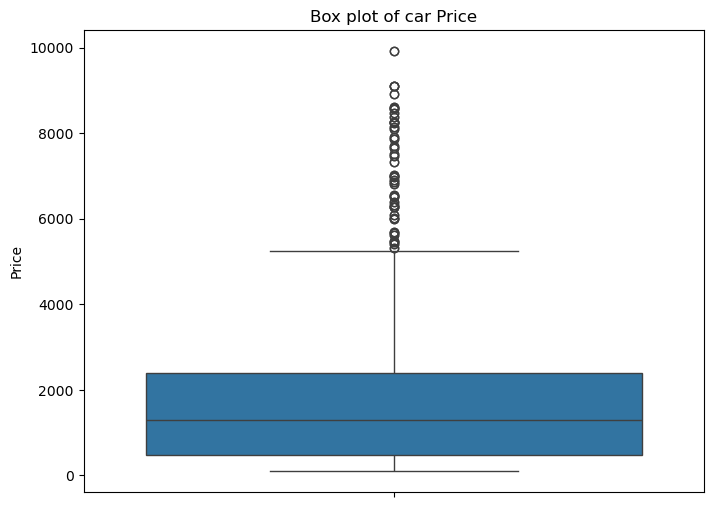

In [35]:
#Continuous Variables
plt.figure(figsize=(8,6))
sns.boxplot(y='Price',data=df2)
plt.title('Box plot of car Price')
plt.ylabel('Price')
plt.show()

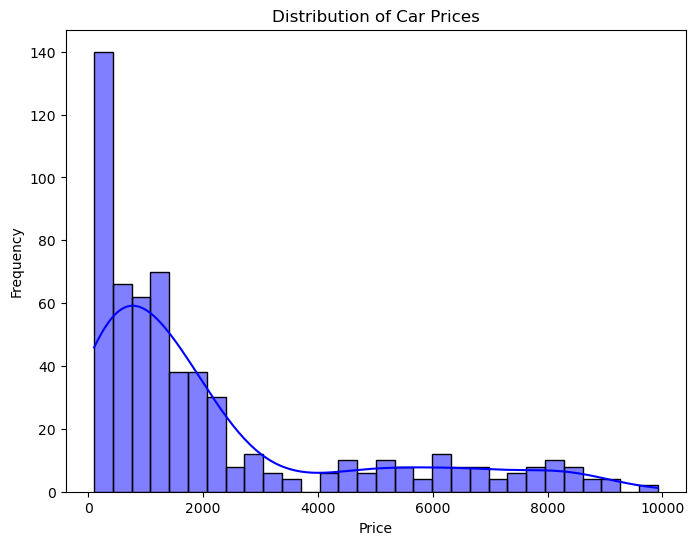

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(df2['Price'], bins=30, kde=True,color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Interpretation:-The boxplot and histogram represents the price of cars.The distribution  of prices are right-skewed,so most cars are 
in the lower price range.The box represents the interquartile range,the middle of the line is median of cars price.Here we can 
see the most of the cars price is below 10 lakhs.This is affordable price for customers to buy a new car.

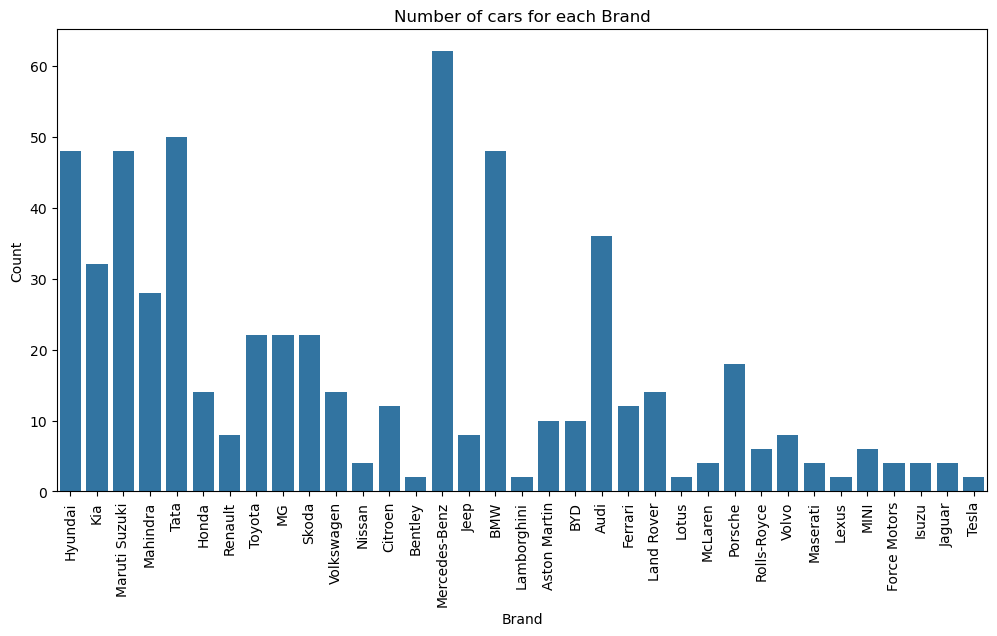

In [37]:
#Categorical Variables
plt.figure(figsize=(12,6))
sns.countplot(x='Brand',data=df2 )
plt.title('Number of cars for each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Interpretation:-The count plot represents the number of cars for each brand.The most frequent brands are the Mercedes-Benz and Maruthi.
    This is most common or popular brand as compared to the other brands.This brands are bugdet friendly.

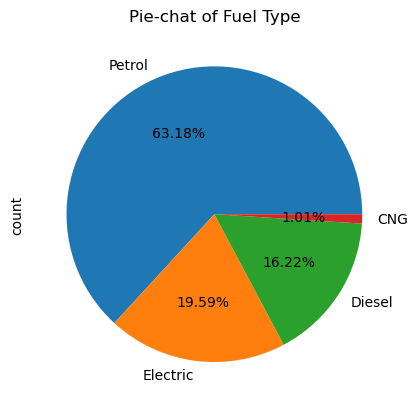

In [38]:
#Pie chart
df2['Fuel_Type'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('Pie-chat of Fuel Type')
plt.show()

Interpretation:-This pie chart hepls us to understand the percentage of type of fuel used by the customers.The highest usage
of fuel is the Petrol and 61% of the people are using the petrol as compared to other fuel type.

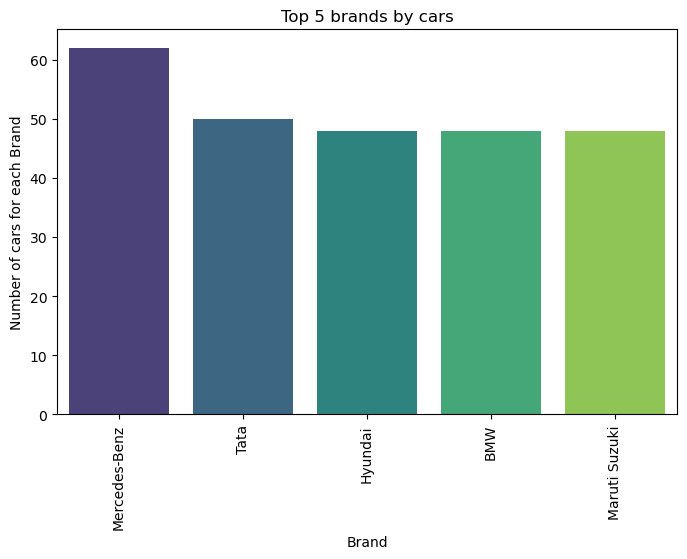

In [39]:
top_brands = df2['Brand'].value_counts().nlargest(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis',hue=top_brands.index,legend=False)

plt.title('Top 5 brands by cars')
plt.xlabel('Brand')
plt.ylabel('Number of cars for each Brand')
plt.xticks(rotation=90)
plt.show()

Interpretation:(Maruti Suzuki, Hyundai, Tata, Mercedes-Benz, BMW )
   1.These brands focus on affordability, fuel efficiency, and low maintenance.
   2.Ideal for first-time buyers and budget-conscious consumers.
   

#  Bi-variate Analysis/Multivariate : 

In [40]:
#Continuous  and Categorical variables (groupby) 
grouped_data=df2.groupby('Fuel_Type').agg({'Price':'mean', 'Seater':'median'}).reset_index()
grouped_data

,Fuel_Type,Price,Seater
0,CNG,1054.000000,5.0
1,Diesel,3444.791667,5.0
2,Electric,2460.155172,5.0
3,Petrol,1748.561497,5.0


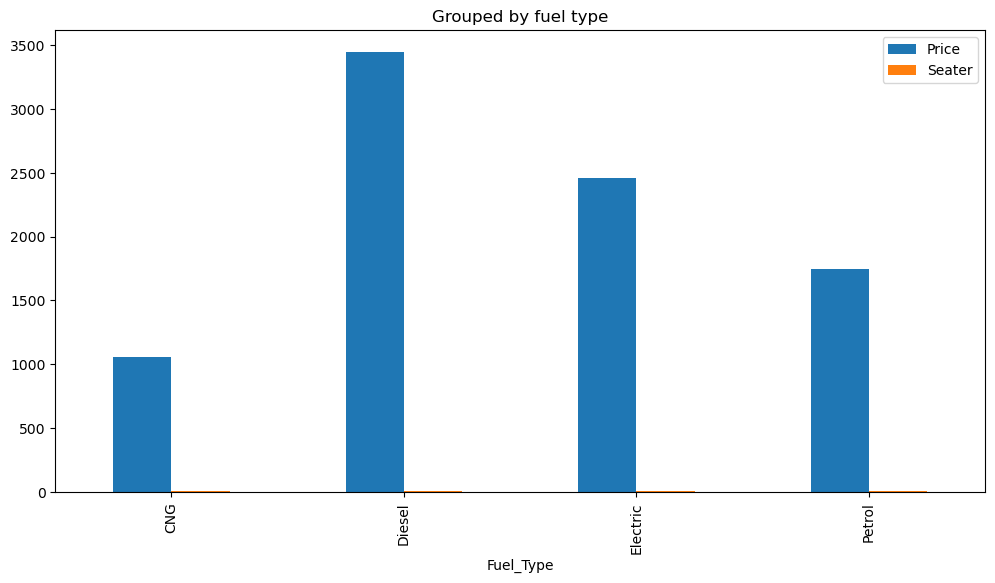

In [41]:
grouped_data.set_index('Fuel_Type').plot(kind='bar',figsize=(12,6))
plt.title("Grouped by fuel type")
plt.show()

Interpretation:Petrol and  Diesel Cars: Usually 5-seaters (most common category) 
               Diesel and Electric cars tend to be more expensive than petrol due to efficiency & technology.

In [42]:
##Continuous  and Categorical variables (pivot table) 
pivot_data=df2.pivot_table(values='Price', index='Transmission', columns='Fuel_Type', aggfunc='mean',fill_value=0)
pivot_data

Fuel_Type,CNG,Diesel,Electric,Petrol
Transmission,,,,
Automatic,0.0,4632.269231,2460.155172,2208.910714
Manual,1054.0,2041.409091,0.000000,1061.106667


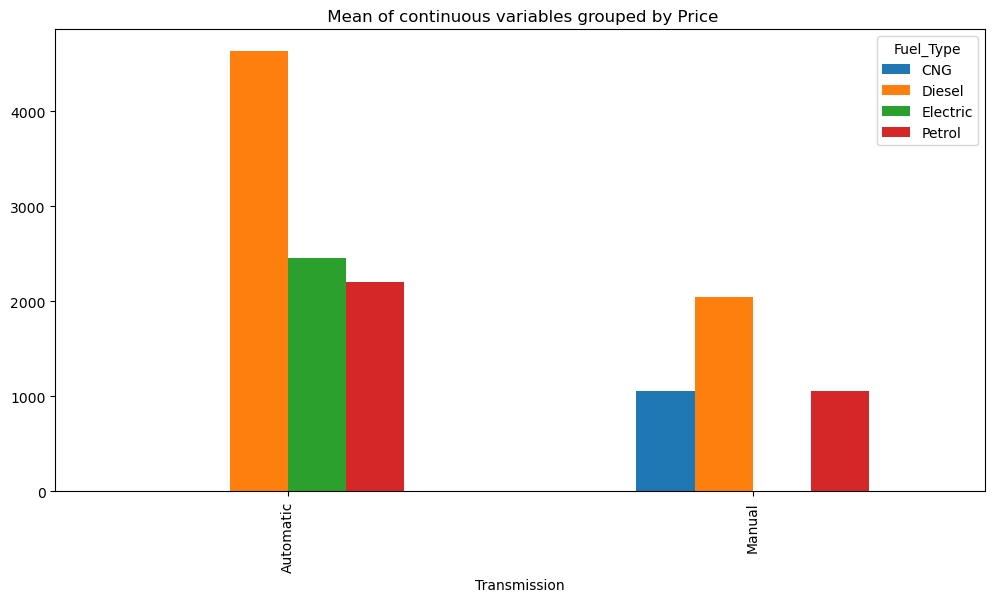

In [43]:
pivot_data.plot(kind='bar',figsize=(12,6))
plt.title(" Mean of continuous variables grouped by Price")
plt.show()

Interpretation: Manual cars (MT) are generally cheaper across all fuel types.
              Automatic transmission vehicles are more expensive, especially in  electric categories.
              Diesel vehicles may have a slightly higher price than petrol due to better mileage and efficiency.
              Electric cars tend to be priced higher due to advanced technology .

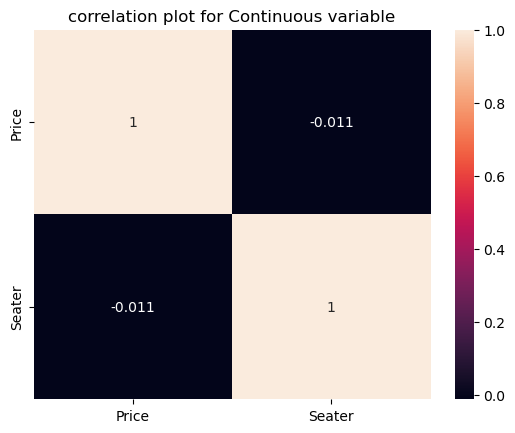

In [44]:
#Continuous  to Continuous variable  (correlation plot)
sns.heatmap(df2[['Price','Seater']].corr(),annot=True)
plt.title('correlation plot for Continuous variable')
plt.show()

Interpretation:- The heatmap helps to visualize the correlation between the numeric variables.Here we can observe the postive 
correlation between the price and seater.If value closer to 1 that indicates the strong positive correlation and value closer to -1 that is 
negative correlation.If the value is 0 there is no correlation between the variables.

In [45]:
#Categorical to Categorical variables  (crosstab)
crosstab_data=pd.crosstab(df2['Fuel_Type'], df2['Transmission'])
crosstab_data

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,6
Diesel,52,44
Electric,116,0
Petrol,224,150


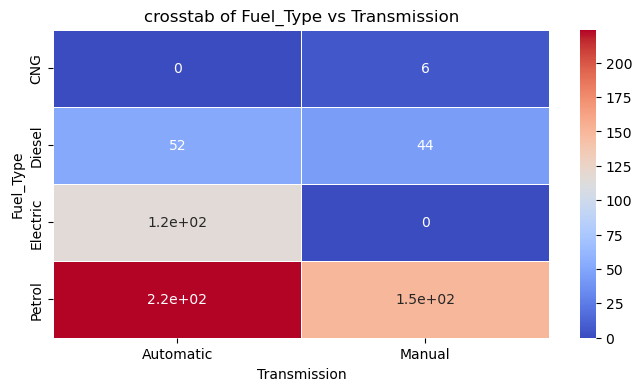

In [46]:
plt.figure(figsize=(8,4))
sns.heatmap(crosstab_data,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("crosstab of Fuel_Type vs Transmission")
plt.show()

Interpretation: Manual Transmission  is more common in Petrol and Diesel cars.
               Petrol & Diesel cars, especially budget-friendly models, often have manual transmissions.This is because manual cars are cheaper to                     manufacture and maintain.Automatic Transmission  is more frequent in Electric cars.This is due to the advanced technology.

Darker Red Shades → Higher count of cars in that category.
Darker Blue Shades → Lower count of cars in that category.
Neutral colors -> Mid-range distribution.

C:\Users\pullu\AppData\Local\Temp\ipykernel_28596\4020887763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type',data=df2,palette = "bright")


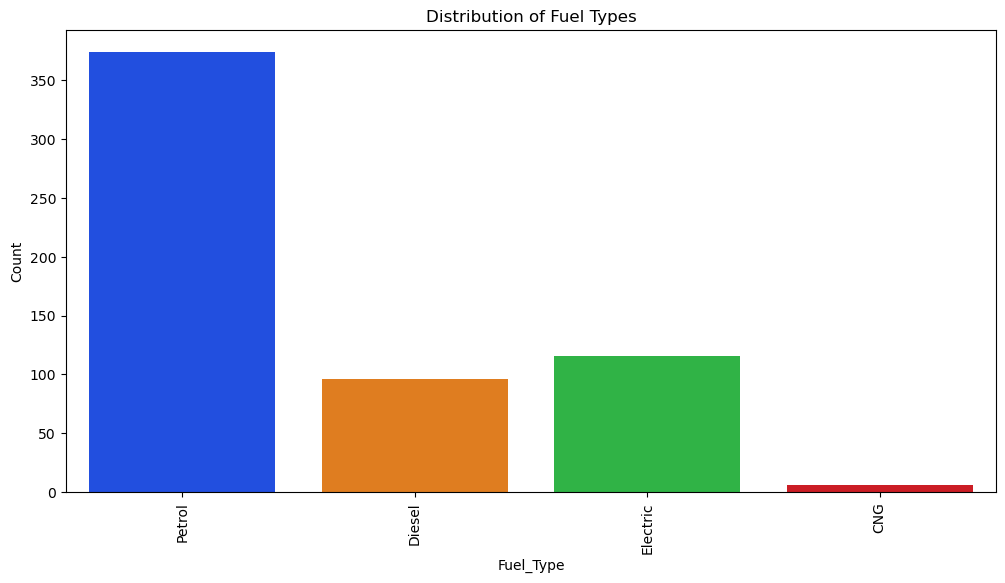

In [47]:
#count plot for fuel
plt.figure(figsize=(12,6))
sns.countplot(x='Fuel_Type',data=df2,palette = "bright")
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Interpretation:- Petrol is the dominant fuel type.
 -> Diesel is preferred for SUVs and high-mileage vehicles.
 -> CNG is  used for affordability and low running costs.
-> Electric cars are gaining popularity

C:\Users\pullu\AppData\Local\Temp\ipykernel_28596\495518849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission',data=df2,palette = "bright")


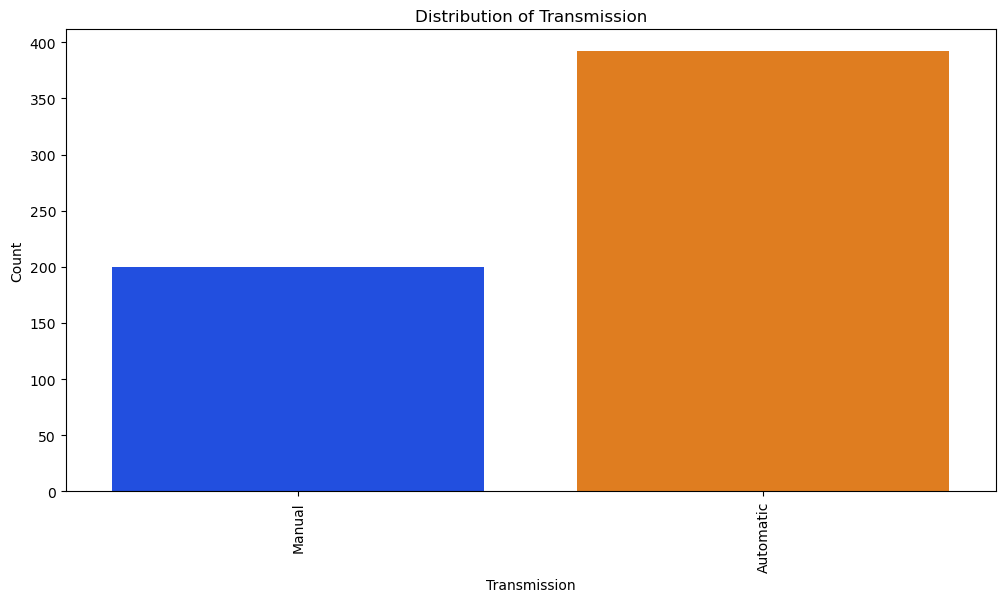

In [48]:
#count plot for Transmission
plt.figure(figsize=(12,6))
sns.countplot(x='Transmission',data=df2,palette = "bright")
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Interpretation:The Automatic transmission is high as compared to the manual transmission.Automatic transmission is more common.
              Manual (MT): More control, better mileage, lower cost.
              Automatic (AT): Smooth, convenient, higher cost.

# Price Vs Brand

C:\Users\pullu\AppData\Local\Temp\ipykernel_28596\3200568651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price',y='Brand',data=df2,palette='bright')


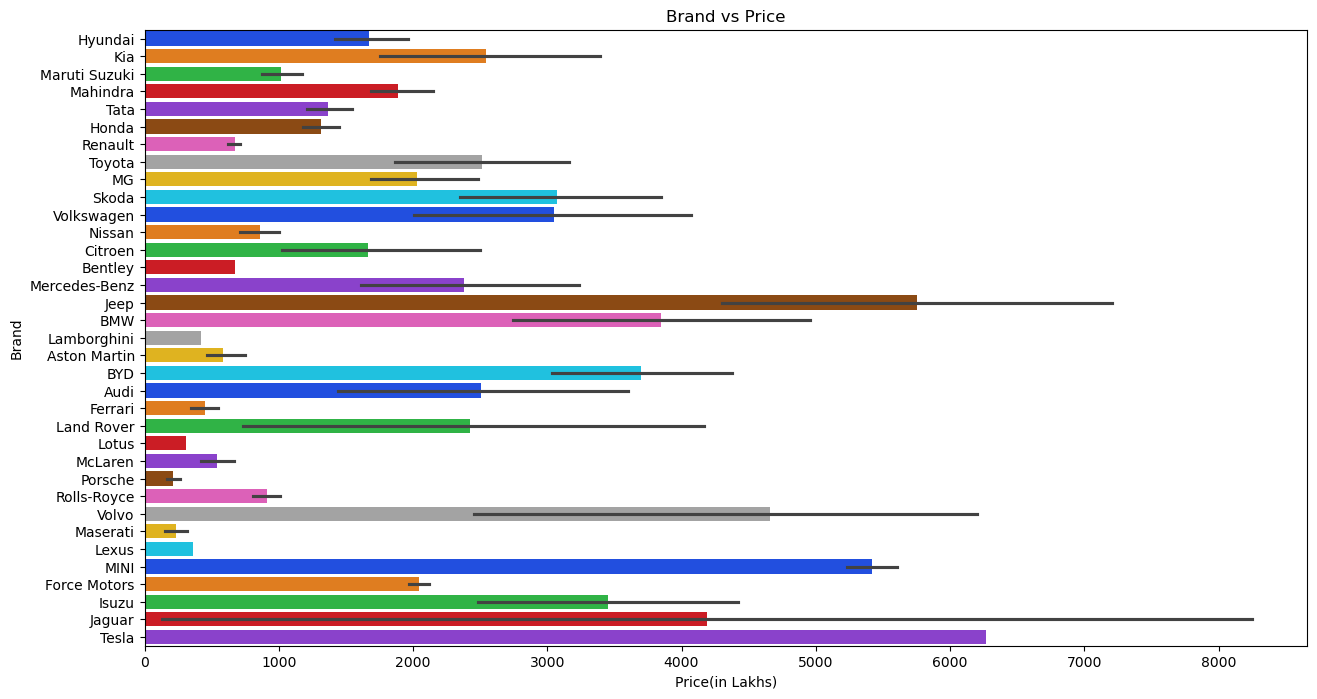

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x='Price',y='Brand',data=df2,palette='bright')
plt.title("Brand vs Price")
plt.xlabel("Price(in Lakhs)")
plt.ylabel("Brand")
plt.show()

Interpretation:Most brands have average price between 5 to 30 lakhs ,it indicates that customers are generally satisfied
with their purcheses.Premium brands tend to have higher prices,while budget brands offer more affordable options.

C:\Users\pullu\AppData\Local\Temp\ipykernel_28596\1998259764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle_Type',data=df2,palette='bright')


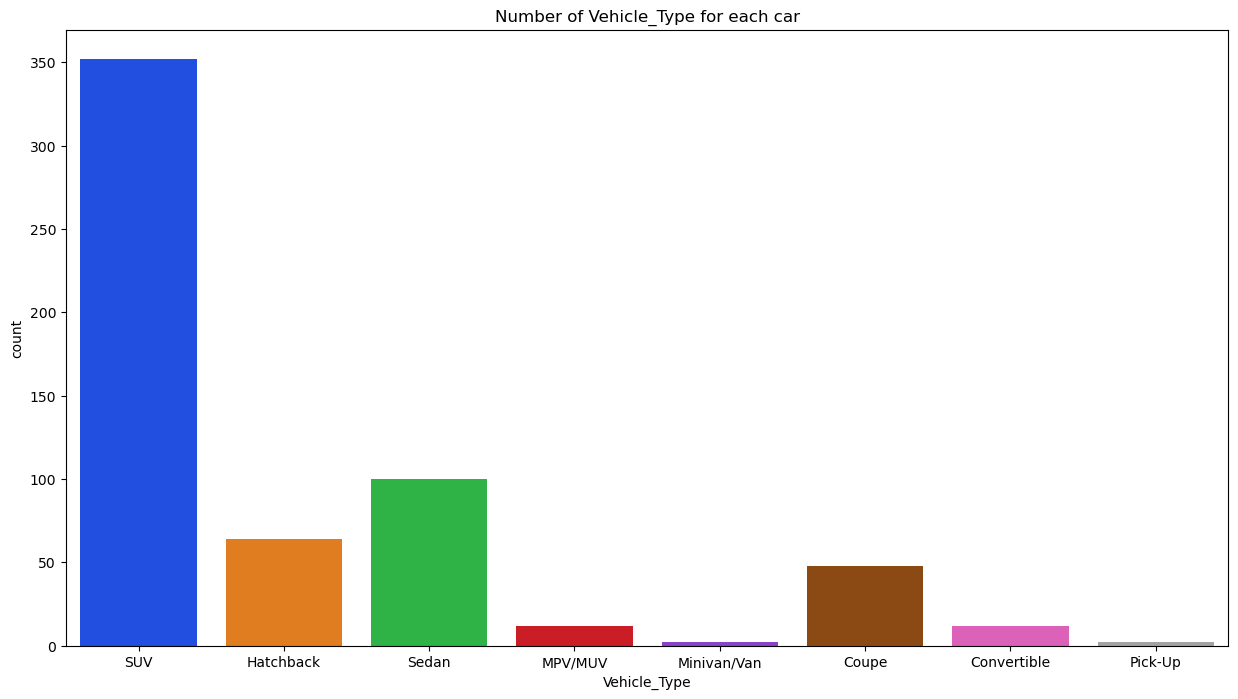

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x='Vehicle_Type',data=df2,palette='bright')
plt.title("Number of Vehicle_Type for each car")
plt.xlabel("Vehicle_Type")
plt.ylabel("count")
plt.show()

Interpretation:  SUVs are the most popular category.
 Sedans remain a strong choice for affordability.
 Hatchback and coupe are declining in popularity due to the rise of SUVs.

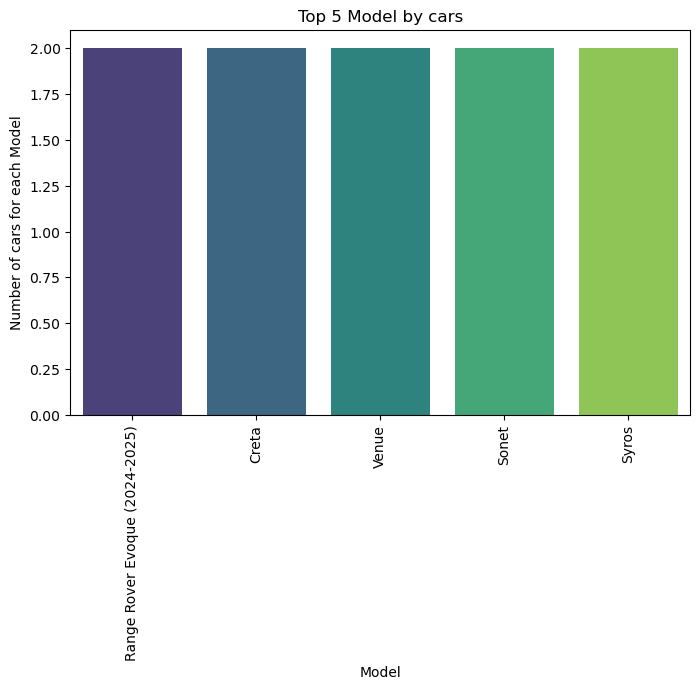

In [51]:

top_brands = df2['Model'].value_counts().nlargest(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis',hue=top_brands.index,legend=False)

plt.title('Top 5 Model by cars')
plt.xlabel('Model')
plt.ylabel('Number of cars for each Model')
plt.xticks(rotation=90)
plt.show()

# Conclusion

When choosing a car, various factors come into play, including brand reputation, model features, price, transmission type, fuel efficiency, available versions, seating capacity, and vehicle type.
Here’s how each factor is interpreted:
1.Brand: Hyundai and Maruthi are budget freindly and fuel_efficient.
         Mercedes-Benz and Jaguar are premium luxury and high performace brands.
2.Price : The price reflects brand value, features, luxury, and technology
          Examples:₹5 - ₹10 lakh: Entry-level cars (Maruti , Hyundai).
                  ₹10 - ₹30 lakh: Mid-range (Hyundai Creta, Toyota Innova).
                  ₹30 lakh - ₹80 lakh and above: Premium & luxury (Mercedes-Benz ,Jaguar)
3.Transmission:  Manual cars (MT) are generally cheaper across all fuel types.
                 Automatic transmission vehicles are more expensive, especially in  electric categories.
             
4.Fuel type:  Diesel vehicles may have a slightly higher price .
              Petrol is  the most common used fuel type.
              Electric cars tend to be priced higher due to advanced technology .
5.Vehicle type :SUV are most dominant category.
                pickup and compact sedan are less popularity.
6.Seaters:Usually 5 seater cars dominate the market
         7 seater cars are growing in demand.
